In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://finance.yahoo.com/quote/AAPL/'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

print(page.status_code)


404


In [3]:
with open('AAPL.html', 'r') as f:
    data = BeautifulSoup(f, "html.parser")

#print(data)
table = data.find_all('tr', {"style":"height: 20px"})
#table = data.find_all('tr', {"style":"height: 20px"})
print(table)

[<tr style="height: 20px"><th class="row-headers-background" id="0R0" style="height: 20px;"><div class="row-header-wrapper" style="line-height: 20px">1</div></th><td class="s0">Date</td><td class="s0">Open</td><td class="s0">High</td><td class="s0">Low</td><td class="s0">Close</td><td class="s0">Adj Close</td><td class="s0">Volume</td></tr>, <tr style="height: 20px"><th class="row-headers-background" id="0R1" style="height: 20px;"><div class="row-header-wrapper" style="line-height: 20px">2</div></th><td class="s1">5/23/22</td><td class="s1">137.789993</td><td class="s1">143.259995</td><td class="s1">137.649994</td><td class="s1">143.110001</td><td class="s1">142.260544</td><td class="s1">117726300</td></tr>, <tr style="height: 20px"><th class="row-headers-background" id="0R2" style="height: 20px;"><div class="row-header-wrapper" style="line-height: 20px">3</div></th><td class="s1">5/24/22</td><td class="s1">140.809998</td><td class="s1">141.970001</td><td class="s1">137.330002</td><td 

In [4]:
stock_price = []
flag = False
count = 0
for x in table:
    #print(x)
    if flag:
        day = x.find_all('td')[0]
        value = x.find_all('td')[4]
        stock_price.append(float(value.text))
        count += 1
        #print(day.text)
        #print(value.text)
    else:
        flag = True;
        
count = 1
x_vals = []
for i in stock_price:
    x_vals.append(count)
    count += 1


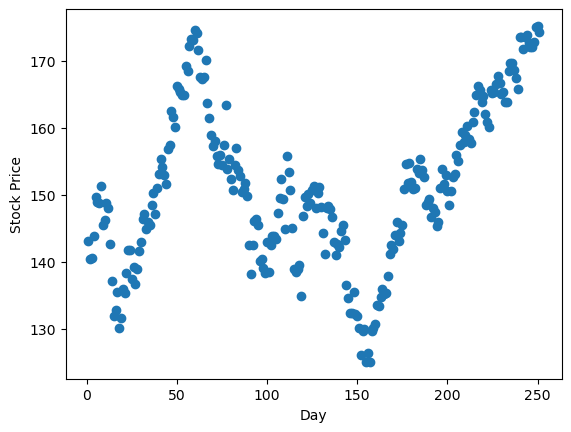

In [5]:
plt.scatter(x_vals, stock_price)
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.show()

In [6]:
x = np.array(x_vals).reshape((-1, 1))
y = np.array(stock_price).reshape((-1, 1))

model = LinearRegression()
model.fit(x, y)

LinearRegression()

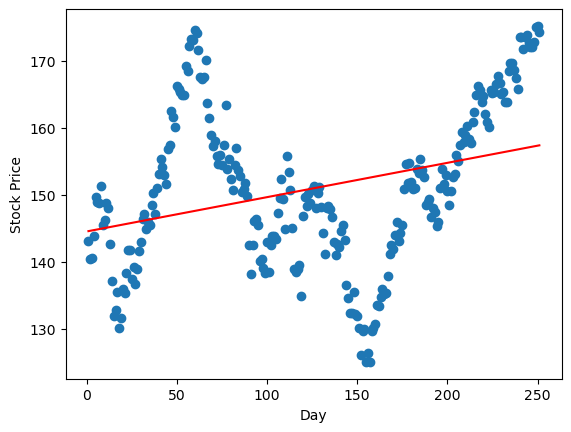

In [7]:
plt.scatter(x_vals, stock_price)
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.show()

In [17]:
arr = model.predict(np.array([[250], [350], [450]]))
print(arr)

[[157.28935511]
 [162.41083103]
 [167.53230695]]
